In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 255)
import matplotlib.pyplot as plt

# Data Preproessing

In [2]:
df = pd.read_csv(r'data/raw_data/SPOTIFY_REVIEWS.csv')
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377423 entries, 0 to 3377422
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   review_id           object
 2   pseudo_author_id    object
 3   author_name         object
 4   review_text         object
 5   review_rating       int64 
 6   review_likes        int64 
 7   author_app_version  object
 8   review_timestamp    object
dtypes: int64(3), object(6)
memory usage: 231.9+ MB
None


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has all the music one can ask for.",5,4,1.1.0.91,2014-05-27 14:36:02
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01
3,3,672a155a-e81e-4d28-bdeb-a74c031bc072,286593453219054880269,A Google user,"Awesome UI, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20
4,4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,167276875678680630145,A Google user,As a professional Android developer I'm glad to see the Spotify team taking security seriously. They made switching packages as painless as possible given the situation.,5,10,1.1.0.91,2014-05-27 15:26:48


In [3]:
df = df.drop(['Unnamed: 0', 'review_id', 'pseudo_author_id'], axis=1, errors='ignore')

In [4]:
# Check number of nan in each column
df.isna().sum()

author_name                0
review_text             1022
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64

In [5]:
# Check the range of rating
df.review_rating.unique()

array([5, 3, 4, 1, 2, 0], dtype=int64)

In [6]:
# Check the number unique value in review_like
# Turns out so many variations in review_like
df.review_likes.nunique()

1204

<Axes: >

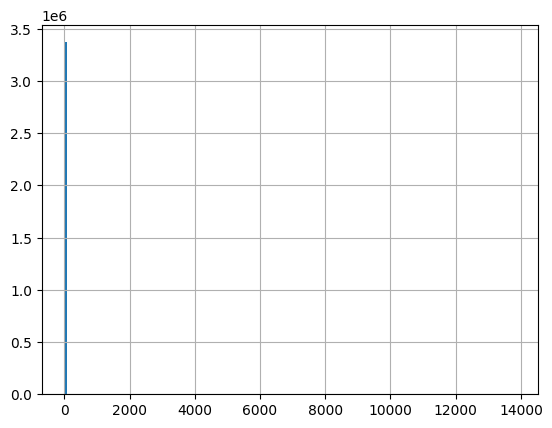

In [7]:
# Check the distribution of each review_like value
# Dominated by 0 review_likes
df.review_likes.hist(bins=200)

In [8]:
# Check number of data based on review like value
df['review_likes'].value_counts()

review_likes
0       3108438
1        161224
2         32192
3         14705
4          8882
         ...   
1528          1
4219          1
436           1
2266          1
1822          1
Name: count, Length: 1204, dtype: int64

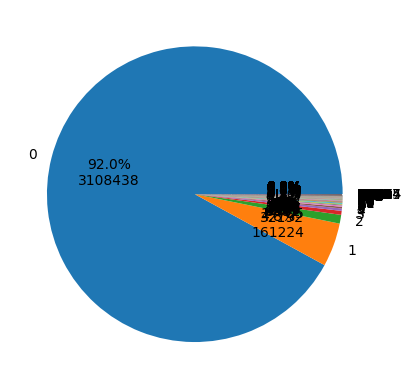

In [9]:
# 92% of review has 0 likes (over 3 mio of data) 
total = df['review_likes'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['review_likes'].value_counts().values, labels=df['review_likes'].value_counts().index, autopct=fmt)
plt.show()

In [10]:
# To minimize the data and minimize the computational resources I only retain the data that has more than 5 (but in app >=5)
# Because the number of likes represent the number of user who like the review. for example the number of review with number of like 6 is 4496 data
# so from 4496 data it represent 6 x 4496 review from global population. 
df = df[df.review_likes>5]
df.review_likes.value_counts()

review_likes
6       4496
7       3511
8       2807
9       2374
10      1922
        ... 
1132       1
1233       1
1495       1
911        1
1822       1
Name: count, Length: 1198, dtype: int64

In [11]:
# Sorted by rating first, then number of like then timestamp
# Related to strategy of doc chunk to vectorstore
df = df.sort_values(by=['review_rating', 'review_likes', 'review_timestamp'], ascending=[False, False, False])
df

,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
1434598,A Google user,"I'm realy enjoying using this app. I literally can find any song I want. It's just AMAZING! I stay up-to-date about latest releases, I can keep track of viral songs in different countries and most importantly I can access to the BEST PLAYLISTS EVER ma...",5,9732,8.5.5.853,2019-05-13 15:15:13
3017967,Ur*********ta,Spotify is a great app to listen to music and podcasts. You can find almost any song here. Spotify regular is not as good though. I remember how many ads there were. Spotify premium is way better. It gives great suggestions and helps discover new song...,5,6244,8.8.22.510,2023-04-02 16:16:10
1398267,A Google user,"i have over 170 songs on only one of my playlists! and you can make many playlists, and find any songs you want! if apps could tell you how many hours you have spent on an app, i would probably have about 100+. Premium is the best to have while using ...",5,6235,8.5.1.734,2019-04-13 14:38:04
2917207,Na*******hi,The best music streaming app ever!!! I'm using it since its launch and it's just gone better and better. The best part is the Wrapped mode we get at the end of each year wrapping all the songs and telling us about the top 5s of each category. Just one...,5,4274,8.7.90.544,2022-12-07 18:00:17
2714912,Ar*******sh,"I have used almost every music provider except apple's music. So, I can say that the differences in audio quality are barely noticeable but the usability differs. For example, here in Spotify, you can stream music from one place to different devices, ...",5,4119,8.7.30.1221,2022-05-15 04:52:02
...,...,...,...,...,...,...
123218,A Google user,"Highly frustrating... Thought I was helping myself, but since i decided to update, I even uninstalled and re installed the app, and it still won't play anything",1,6,1.9.0.1273,2014-12-19 03:12:05
113011,A Google user,Washed down app compared to the PC version. It only allows a certain amount of skips and that's it..it only let's you play on shuffle play...oh and plus the loads of ads makes it not worthwhile to finish the rest of the playlist. Not worth it.,1,6,1.8.0.993,2014-12-01 23:39:14
98487,A Google user,My phone won't open it and I constantly receive notifications that it has stopped working.,1,6,1.7.0.830,2014-11-07 21:14:35
63328,A Google user,"I just downloaded your app a couple of hours ago and started to browse. When I chose some songs off the play list,from an assortment of songs, there were a couple, after they started playing, that I didn't want. There was no way to get rid of them, an...",1,6,1.4.0.631,2014-09-07 20:10:03


In [12]:
import re
def contains_foreign_emot_chars(text):
    # Regular expression to match non-ASCII characters
    foreign_char_pattern = r'[^\x00-\x7F]+'
    emoticon_pattern = re.compile(u'['
                              u'\U0001F600-\U0001F64F'  # emoticons
                              u'\U0001F300-\U0001F5FF'  # symbols & pictographs
                              u'\U0001F680-\U0001F6FF'  # transport & map symbols
                              u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
                              ']+', flags=re.UNICODE)
    
    if pd.Series(text).str.contains(foreign_char_pattern).any() or pd.Series(text).str.contains(emoticon_pattern).any():
        return True
    else:
        return False
print(len(df[df['review_text'].apply(contains_foreign_emot_chars)]))
idx = df[df['review_text'].apply(contains_foreign_emot_chars)].index.tolist()
df[df['review_text'].apply(contains_foreign_emot_chars)].head()
# 3341 out of 45813 data are contain foreign chars or emoticon
# but we can't really remove the review that not using english because unicode for emoticon and foreign character is intersected.

3341


,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
2845742,Av***************gh,"This is a pretty good app for music 🎶🎵and podcasts. I also want to add that the people who are saying that the ads in the app are annoying must be misunderstanding something, as Spotify has a very limited amount of ads. The app is giving much more whi...",5,3382,8.7.62.398,2022-09-22 20:47:48
3174216,Su************sh,"I've been using Spotify for years now, and I can honestly say that it's the best music streaming app out there. It has a massive library of music, from all genres and eras. The playlists are well-curated, and the algorithm for music discovery is excel...",5,2861,8.8.54.481,2023-07-25 04:35:14
3026295,Ab************an,"Spotify is the best music streaming app I've ever used! With a massive library of songs, podcasts, and playlists, there's something for everyone. The UI is sleek, easy to navigate, and the personalized playlists help discover amazing new tracks. Shari...",5,1869,8.8.24.307,2023-04-13 02:45:19
1321805,A Google user,"I love Spotify. I've had I ❤ Radio forever, but other than letting you pick your favorite artists (and even then you get music like it when you save their stations and play them). To do anything else you have to pay. Spotify lets you choose from a lot...",5,1625,8.4.94.817,2019-02-26 18:42:16
2836670,Sh*****aj,"Spotify is good, there is whole song available here. None of the songs are missing in this app and all the facilities are good but i felt one thing was missing that is we cannot manage the songs in playlist like we cannot take songs up or down as we w...",5,1553,8.7.62.398,2022-09-12 14:52:12


In [13]:
# Function to remove emoticons and foreign characters
def remove_emoticons_and_foreign_chars(text):
    # Regular expression to match common emoticon patterns
    emoticon_pattern = re.compile(u'['
                                  u'\U0001F600-\U0001F64F'  # emoticons
                                  u'\U0001F300-\U0001F5FF'  # symbols & pictographs
                                  u'\U0001F680-\U0001F6FF'  # transport & map symbols
                                  u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
                                  ']+', 
                                  flags=re.UNICODE)
    # Regular expression to match foreign language characters
    foreign_char_pattern = re.compile(r'[^\x00-\x7F]+')

    # Remove emoticons
    text = emoticon_pattern.sub('', text)
    # Remove foreign characters
    clean_text = foreign_char_pattern.sub('', text)
    return clean_text

# Apply the function to remove emoticons and foreign characters from the 'text' column
df['review_text'] = df['review_text'].apply(remove_emoticons_and_foreign_chars)
df[['review_text']].loc[idx].head()

,review_text
2845742,"This is a pretty good app for music and podcasts. I also want to add that the people who are saying that the ads in the app are annoying must be misunderstanding something, as Spotify has a very limited amount of ads. The app is giving much more while..."
3174216,"I've been using Spotify for years now, and I can honestly say that it's the best music streaming app out there. It has a massive library of music, from all genres and eras. The playlists are well-curated, and the algorithm for music discovery is excel..."
3026295,"Spotify is the best music streaming app I've ever used! With a massive library of songs, podcasts, and playlists, there's something for everyone. The UI is sleek, easy to navigate, and the personalized playlists help discover amazing new tracks. Shari..."
1321805,"I love Spotify. I've had I Radio forever, but other than letting you pick your favorite artists (and even then you get music like it when you save their stations and play them). To do anything else you have to pay. Spotify lets you choose from a lot ..."
2836670,"Spotify is good, there is whole song available here. None of the songs are missing in this app and all the facilities are good but i felt one thing was missing that is we cannot manage the songs in playlist like we cannot take songs up or down as we w..."


In [14]:
df['review_text'] = df['review_text'].replace(r'\s+', ' ', regex=True)
df['review_text'] = df['review_text'].str.strip()

In [ ]:
# Convert dataframe to text data to get the review text
def dataframe_to_text(df, column_name, output_file):
    try:
        with open(output_file, 'w', encoding='utf-8') as file:
            file.write('THIS IS A GOOGLE STORE REVIEWS FOR SPOTIFY APPLICATION:' + '\n')
            for index, row in df.iterrows():
                review_text = row[column_name]
                file.write(review_text + '\n')
        print(f"Data successfully saved to {output_file}")
    except Exception as e:
        print(f"Error occurred: {str(e)}")
dataframe_to_text(df, 'review_text', 'spotify_reviews.txt')

# Model, Parameter Setting

In [17]:
import torch
torch.cuda.is_available()
# check cuda is available

True

In [18]:
# EMBEDDING MODEL
# Use bge model from huggingface.
# Do connection from langchain huggingface

from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from llama_index.embeddings.langchain import LangchainEmbedding
model_name = "BAAI/bge-large-en-v1.5"
model_kwargs = {'device': 'cuda'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

embed_model_hf  = HuggingFaceBgeEmbeddings(
    model_name=model_name, 
    model_kwargs=model_kwargs, 
    encode_kwargs=encode_kwargs,
    query_instruction="Represent this sentence for searching relevant passages: "
)

embed_model = LangchainEmbedding(embed_model_hf, embed_batch_size=100)
len(embed_model.get_text_embedding("It is raining cats and dogs here!"))


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin C:\Users\Bens\anaconda3\envs\lc\lib\site-packages\bitsandbytes\libbitsandbytes_cuda116.dll
function 'cadam32bit_grad_fp32' not found
CUDA SETUP: Loading binary C:\Users\Bens\anaconda3\envs\lc\lib\site-packages\bitsandbytes\libbitsandbytes_cuda116.dll...


C:\Users\Bens\anaconda3\envs\lc\lib\site-packages\bitsandbytes\cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


1024

In [19]:
# LLM MODEL
# USE MISTRAL 7B QUANTIZED 4BIT WITH LLAMA.CPP
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_index.llms.llama_cpp import LlamaCPP
from llama_index.llms.llama_cpp.llama_utils import (
    messages_to_prompt,
    completion_to_prompt,
)

llm = LlamaCPP(
    # You can pass in the URL to a GGML model to download it automatically
    model_path=r"D:\mistral-7b-instruct-v0.2.Q4_K_M.gguf",
    # optionally, you can set the path to a pre-downloaded model instead of model_url
    temperature=0.2,
    max_new_tokens=512,
    # llama2 has a context window of 4096 tokens, but we set it lower to allow for some wiggle room
    context_window=3900,
    # kwargs to pass to __call__()
    generate_kwargs={},
    # kwargs to pass to __init__()
    # set to at least 1 to use GPU
    model_kwargs={"n_gpu_layers": 35},
    # transform inputs into Llama2 format
    messages_to_prompt=messages_to_prompt,
    completion_to_prompt=completion_to_prompt,
    verbose=True,
)
response_iter = llm.stream_complete("Can you write me a poem about fast cars?")
for response in response_iter:
    print(response.delta, end="", flush=True)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from D:\mistral-7b-instruct-v0.2.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:               

 In the realm where metal beasts roar and fly,
Through the veil of midnight, under the moon's soft light,
Fast cars dance with the stars in the endless night,
Their engines purring like lions, their tires alight.

A symphony of power in every rev,
A heartbeat of steel that never slows or quits,
Their frames sculpted for speed, their lines sleek and fit,
In the race of life, they're the unwavering bit.

Through twists and turns, they carve the winding road,
Leaving echoes of their thunderous roar,
Their drivers, one with the machine, their will unbroken,
In the dance of speed, they're the unyielding token.

So here's to the fast cars, the kings of the night,
Their engines roaring, their spirits alight,
In the race of life, they're the unyielding force,
A testament to the human thirst for the course.


llama_print_timings:        load time =     152.24 ms
llama_print_timings:      sample time =      24.16 ms /   236 runs   (    0.10 ms per token,  9767.00 tokens per second)
llama_print_timings: prompt eval time =     152.15 ms /    73 tokens (    2.08 ms per token,   479.78 tokens per second)
llama_print_timings:        eval time =    4010.15 ms /   235 runs   (   17.06 ms per token,    58.60 tokens per second)
llama_print_timings:       total time =    4853.26 ms /   308 tokens


In [20]:
# SET SERVICE CONTEXT IN LLAMA INDEX
from llama_index.core import ServiceContext
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core.callbacks import LlamaDebugHandler, CallbackManager

node_parser = SimpleNodeParser.from_defaults(chunk_size=1024, 
                                             chunk_overlap=20)

llama_debug = LlamaDebugHandler(print_trace_on_end=True)
callback_manager = CallbackManager(handlers=[llama_debug])

service_context = ServiceContext.from_defaults(
    llm=llm, 
    embed_model=embed_model,
    node_parser=node_parser,
    callback_manager=callback_manager                                               
    )


C:\Users\Bens\AppData\Local\Temp\ipykernel_12856\3586380879.py:11: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(


# Data Ingestion to Vector Store

In [22]:
import os.path
from llama_index.core import (
    VectorStoreIndex,
    SimpleDirectoryReader,
    StorageContext,
    load_index_from_storage,
)

# check if storage already exists
PERSIST_DIR = "./storage"
if not os.path.exists(PERSIST_DIR):
    # load the documents and create the index
    documents = SimpleDirectoryReader("data").load_data()
    index = VectorStoreIndex.from_documents(documents=documents,
                                            service_context=service_context,
                                            show_progress=True)
    # store it for later
    index.storage_context.persist(persist_dir=PERSIST_DIR)
    print('BUILDING VECTOR STORE...')
else:
    # load the existing index
    storage_context = StorageContext.from_defaults(persist_dir=PERSIST_DIR)
    index = load_index_from_storage(storage_context, service_context=service_context)

Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/2048 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/1712 [00:00<?, ?it/s]

**********
Trace: index_construction
    |_embedding ->  18.979195 seconds
    |_embedding ->  16.621614 seconds
    |_embedding ->  20.065158 seconds
    |_embedding ->  21.471064 seconds
    |_embedding ->  20.432842 seconds
    |_embedding ->  22.367947 seconds
    |_embedding ->  21.415999 seconds
    |_embedding ->  20.045473 seconds
    |_embedding ->  21.400058 seconds
    |_embedding ->  21.337998 seconds
    |_embedding ->  20.207923 seconds
    |_embedding ->  21.153506 seconds
    |_embedding ->  21.344252 seconds
    |_embedding ->  21.135 seconds
    |_embedding ->  20.309001 seconds
    |_embedding ->  21.288999 seconds
    |_embedding ->  21.388431 seconds
    |_embedding ->  19.954015 seconds
    |_embedding ->  23.215002 seconds
    |_embedding ->  21.199998 seconds
    |_embedding ->  6.456999 seconds
    |_embedding ->  21.834698 seconds
    |_embedding ->  21.435167 seconds
    |_embedding ->  20.435874 seconds
    |_embedding ->  20.870999 seconds
    |_embedding -

# Query

In [ ]:
query_engine = index.as_query_engine(service_context=service_context, similarity_top_k=2)

In [23]:
response = query_engine.query("What are the specific features or aspects that users appreciate the most in our application?")
print(response)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     152.24 ms
llama_print_timings:      sample time =      41.99 ms /   419 runs   (    0.10 ms per token,  9977.62 tokens per second)
llama_print_timings: prompt eval time =    3122.23 ms /  3325 tokens (    0.94 ms per token,  1064.94 tokens per second)
llama_print_timings:        eval time =    9862.79 ms /   418 runs   (   23.60 ms per token,    42.38 tokens per second)
llama_print_timings:       total time =   14044.03 ms /  3743 tokens


**********
Trace: query
    |_query ->  14.539336 seconds
      |_retrieve ->  0.477999 seconds
        |_embedding ->  0.341 seconds
      |_synthesize ->  14.061337 seconds
        |_templating ->  0.0 seconds
        |_llm ->  14.053336 seconds
**********
 Based on the reviews provided in the text file at the given path, users appreciate the following features of the Spotify application:
- Intuitive interface
- Fantastic recommendation engine
- Customized playlists
- Social tools for sharing
- Ability to use it on various devices
- Organization of music into playlists and folders
- Wide range of music selection including podcasts and audio books
- Easy navigation and discovery of new music
- Ability to follow artists and save entire discographies
- Cost-effectiveness for both free and paid versions
- Availability of music offline
- Sharing and building playlists with friends
- Accessibility on various devices including Samsung phones and Gear Fit 2
- Discovering new music and learni

In [24]:
print(vars(response).keys())
response.response

dict_keys(['response', 'source_nodes', 'metadata'])


' Based on the reviews provided in the text file at the given path, users appreciate the following features of the Spotify application:\n- Intuitive interface\n- Fantastic recommendation engine\n- Customized playlists\n- Social tools for sharing\n- Ability to use it on various devices\n- Organization of music into playlists and folders\n- Wide range of music selection including podcasts and audio books\n- Easy navigation and discovery of new music\n- Ability to follow artists and save entire discographies\n- Cost-effectiveness for both free and paid versions\n- Availability of music offline\n- Sharing and building playlists with friends\n- Accessibility on various devices including Samsung phones and Gear Fit 2\n- Discovering new music and learning what they like before investing money\n- Offline mode feature for listening to favorite songs anywhere\n- Integration with other apps and devices such as Android Auto and BMW ConnectedDrive (when functioning properly)\n- Ability to pause, pl

In [25]:
# Number of nodes
print(len(response.source_nodes))
# Print first node result
response.source_nodes[0].node.text

3


"I do hope there's more interface customization in the future for the home page.\r\nSpotify has the best intuitive interface, a fantastic recommendation engine powering its customized playlists, new features added all the time, social tools that make sharing easy, plus you can use it almost anywhere through almost any device. I really like what you have done with the design recently giving it more of a Fluid Look so Keep it Up ✌🏻.\r\nI watch the video for 30 minites of ad free music and then it will play 3 ads every two songs. And long ads at that. Really wish they were honest when it came to there few free perks when using the app. And no i dont want premium. Another thing is when I press play and it finishes the one song it starts playing the song that I just played before it all because I paused it and shut down the app for like maybe an hour when I go back to finish the playlist it start over again\r\nThe app itself is very intuitive and works well. I can typically find what I'm lo

In [26]:
# Print second node result
response.source_nodes[1].node.text

"I'm impressed with the overall look, range of choices and auto playlist design. There's still a lot of room for improvement in user experience area for non-premium users. I often try to listen to a new playlist but after the annoying 'listen to this ad for 30 mins of uninterrupted listening' the media player starts playing a song from a completely different playlist first. Like there's no way Lane 8 would be on the same playlist as Kumar Sanu.\r\nI only use this app to listen to podcasts and for that purpose it's great. It keeps a list of all the podcasts I follow and a list that's updated daily with the podcasts' new episodes. My only issue is the lock screen controls. I can no longer use them to pause or play a podcast, but can use them to move between episodes within a podcast. This issue began after the last update (2-26-20) and is very annoying. Were it not for this issue, I'd give the app five stars.\r\nCan't pause a song. Why do I need a stable internet connection to pause a so